<a href="http://landlab.github.io"><img style="float: left" src="https://raw.githubusercontent.com/landlab/tutorials/release/landlab_header.png"></a>

# Application to a large watershed – Effect of rainfall intensity on morphological changes
This notebook was created by Sam Anderson, Mikey Sison and Angel Monsalve.

<hr>
<small>For tutorials on learning Landlab, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<hr>

**What is this notebook?**

All our previous bed evolution tests had a predominant flow direction and were restricted to pure erosion or deposition. We conducted a final test of our LEM in a more complex and larger watershed to analyze the how flow discharge and bed surface elevation varies at different locations within the domain under different rainfall events. We used the synthetic square watershed from Adams et al. (2017) which has an area of 36 km2 with a resolution of 30 x 30 m per pixel and elevations ranging from 0 m at the basin outlet to 225 m at the highest point (Figure 10 a). Two cases of temporal distribution of rainfall intensity were considered, both having the same total volume of water precipitated (10 mm). We referred to these cases as i) uniform, in which the rainfall intensity was 5 mm/hr lasting for two hours and ii) intermittent, where rainfall can reach up to 25 mm/hr during 350 s and then goes back to zero (Figure 10 b). Changes in flow discharge and bed surface elevation were quantified in three locations: Site 1 which coincides with the watershed outlet, Site 2 located upstream the outlet and upstream the confluence of the most downstream tributaries, and Site 3 located approximately at the center of the watershed (Figure 10 a). 

We ran each model for 24 hours, set Manning’s n constant in the whole watershed with a value of 0.035, set the option for  steep_slopes to True in OverlandFlow, used the bed load transport equation of Meyer-Peter & Müller (1948) with a D_50 of 32 mm, and allowed the critical shear stress to vary spatially using the equation of  Mueller et al. (2005) (variableCriticalShearStress = True). All other variables during the instantiation of the components had default values. Each rainfall intensity case was simulated with and without activating riverBedDynamics (4 cases in total) to analyze the effect that the selected temporal distribution of rainfall intensity has on flow hydraulics (e.g., flow discharge) and in turn on morphological changes. When running only OverlandFlow (i.e., riverBedDynamics deactivated) the resulting hydrograph for both the uniform and intermittent cases have a relatively smooth shape at the three sites (Figure 10 b). In the intermittent case, the peak discharge arrives first at every site and has a larger magnitude (50.9 m3/s arriving after 2.1 hours compared to 42.8 m3/s at 2.6 hours for the uniform case). If the bed surface elevation evolves as a function of the local flow conditions (i.e., riverBedDynamics is activated) the resulting hydrograph had a lower peak discharge. At the outlet and at Site 2 the reductions are nearly 15% and 33% for the uniform and intermittent case, respectively (Figure 10 b). At Site 3 the changes in hydrograph shape are relatively small with discharge peak decreasing from 14.7 to 14.2 m3/s in the uniform case and from 20.3 to 18.9 m3/s in the intermittent scenario. Additionally, the shape of the hydrograph at sites 1 and 2 is no longer smooth everywhere and contains a small spike at the location of the highest discharge. In general, the rising and falling hydrograph limbs in both rainfall scenarios and in all sites are similar and the curves practically overlap each other. The largest differences in magnitude are concentrated around the peak discharge. To better understand how bed evolution affects flow dynamics we integrated the hydrographs in time and obtained the cumulative flow volume (subpanel cumulative flow volume, Figure 10 b). When considering the no bed evolution case, approximately after one day of simulation the flow exiting the watershed (sampled at the outlet) is equal to the volume of water that entered as precipitation (36·104 m3). This proves that mass is well preserved in OverlandFlow and that the square watershed has no sinkholes. However, a difference of 19.4·103 and 48.6·103 m3 between the predicted cumulative flow volume and total rainfall is observed in the uniform and intermittent cases, respectively, when we let the bed evolve. This is not a mass conservation problem but rather a consequence of erosion and deposition patterns within the basin. In the selected sites riverBedDynamics predicts only deposition of sediment, except for Site 3 in the uniform rainfall intensity where the change is practically null. For these places, the intermittent scenario generates consistently larger depositions compared to the uniform case. Most of the bed elevation changes occurred during the first 3 hours of simulation, where the larger discharges and therefore larger shear stresses occurred. In other locations within the watershed we observed scour and deposition of sediments (Figure 11 a and b).

The differences between the predicted cumulative flow volume and total rainfall after 24 hours of simulations can be explained by the morphological changes within the watershed. Here, we analyzed in more detail the intermittent case, but the same analysis is valid for the uniform scenario. When we let the bed evolve different patterns of erosion and deposition were created in the basin (Figure 11 a). In the intermittent case bed surface elevation changes ranged approximately between -2 to 2 m (±1.25 m in the uniform case). This combination of local scour and deposition affected the local flow and created zones that retained large volumes of water (Figure 11 b and c) in quantities practically equal to the volume differences (48.6·103 m3 for the intermittent case). They are not equal because after 24 hours the discharge flowing at the outlet is still 0.052 m3/s and reaches zero at around 36 hours. Most of the nodes where erosion or deposition was predicted are located close to confluences or regions where there are changes in the local channel streamwise direction. The total area that had erosion or deposition larger than 1 cm is 0.2907 km2.

More background on the model used here and the results presented will be published in the future and the citation will be added here:

**TITLE HERE**

The code used in this exercise is taken from the above reference.



**Now on to the code.**
* Below we import Landlab components, functions for importing data, numpy and plotting tools. You should not need to change this.

In [1]:
## Code Block 1

%reset -f
import numpy as np
import pandas as pd
import copy

import os
import shutil
from matplotlib import pyplot as plt
from landlab.components import OverlandFlowSpatiallyVariableInputs, RiverBedDynamics
from landlab.io import read_esri_ascii
from landlab import imshow_grid
#from saveRaster import saveRaster

Here, the user will choose the the digital elevation model (DEM), grain size distribution (GSD) and location, and rainfall intensity and duration. Uncomment the #''' #''' to select different cases. 


In [2]:
## Code Block 2

#Case 4a noBedEvolution: uniform 
#'''
gsd = pd.read_excel('Case4a_noBedEvolution\\Case4a_1_uniform\\bedGSD.xlsx',sheet_name='GSD',skiprows=0).values
bedElevation = 'Case4a_noBedEvolution\\Case4a_1_uniform\\Square_TestBasin.asc'         # ASCII raster DEM containing the bed surface elevation
rainfallFile = 'Case4a_noBedEvolution\\Case4a_1_uniform\\rainfallIntensity.xlsx'
#'''

#Case 4a noBedEvolution: intermittent 
'''
gsd = pd.read_excel('Case4a_noBedEvolution\\Case4a_2_intermittent\\bedGSD.xlsx',sheet_name='GSD',skiprows=0).values
bedElevation = 'Case4a_noBedEvolution\\Case4a_1_uniform\\Square_TestBasin.asc'         # ASCII raster DEM containing the bed surface elevation
rainfallFile = 'Case4a_noBedEvolution\\Case4a_1_uniform\\rainfallIntensity.xlsx'
'''

#Case 4b bedEvolution: uniform 
'''
gsd = pd.read_excel('Case4a_bedEvolution\\Case4a_1_uniform\\bedGSD.xlsx',sheet_name='GSD',skiprows=0).values
bedElevation = 'Case4a_noBedEvolution\\Case4a_1_uniform\\Case4a_noBedEvolution\\Case4a_1_uniform\\Square_TestBasin.asc'         # ASCII raster DEM containing the bed surface elevation
rainfallFile = 'Case4a_noBedEvolution\\Case4a_1_uniform\\rainfallIntensity.xlsx'
'''

#Case 4b bedEvolution: intermittent 
'''
gsd = pd.read_excel('Case4a_bedEvolution\\Case4a_2_intermittent\\bedGSD.xlsx',sheet_name='GSD',skiprows=0).values
bedElevation = 'Case4a_noBedEvolution\\Case4a_1_uniform\\Square_TestBasin.asc'         # ASCII raster DEM containing the bed surface elevation
rainfallFile = 'Case4a_noBedEvolution\\Case4a_1_uniform\\rainfallIntensity.xlsx'
'''


"\ngsd = pd.read_excel('Case4a_bedEvolution\\Case4a_2_intermittent\\bedGSD.xlsx',sheet_name='GSD',skiprows=0).values\nbedElevation = 'Case4a_noBedEvolution\\Case4a_1_uniform\\Square_TestBasin.asc'         # ASCII raster DEM containing the bed surface elevation\nrainfallFile = 'Case4a_noBedEvolution\\Case4a_1_uniform\\rainfallIntensity.xlsx'\n"

In the code block below, we define some important model parameters. We also define where the link and node we will be sampling data from.

In [3]:
## Code Block 3

dtPrecision = 3         # Avoids rounding errors
max_dt = 1              # Overland flow will use the min time step between this value and the automatically calculated. Use seconds.
tPlot = 1800            # Plots will be obtained every this seconds
storeData = 5           # Stores results every this time
tmax = 24*3600+max_dt   # Maximum simulation time, adding max_dt ensures that the last time is stored
n = 0.035               # Manning's n

# Link and node where samples will be collected
link_to_sample = np.array([299, 698,1496,2694,32221])
node_to_sample = np.array([300,700,16102])

Uncomment the code below for Case4b- bedEvolution.

In [4]:
## Code Block 4

# nCyclesFlow = 5 

The following code block removes old figures so that figures generated during each model run can be saved.

In [5]:
## Code Block 4

directory = os.getcwd() ; test = os.listdir( directory )

for item in test:
    if item.endswith(".png"):
        os.remove( os.path.join( directory, item ) )
    if item.endswith(".txt"):
        os.remove( os.path.join( directory, item ) )  

Here we create necessary fields.

In [6]:
## Code Block 5

OverlandFlowSpatiallyVariableInputs.input_var_names
RiverBedDynamics.input_var_names
(rmg, z) = read_esri_ascii(bedElevation, name='topographic__elevation')
rmg.add_zeros('bed_surface__roughness', at = 'link')
rmg.add_zeros('surface_water__depth', at = 'node')
rmg.add_zeros('rainfall__intensity', at = 'node')
rmg['node']['bed_surface__grainSizeDistribution_location'] = np.zeros_like(z)     

And here we instantiate the two components we use for these experiments.

In [7]:
## Code Block 6

of = OverlandFlowSpatiallyVariableInputs(rmg, dt_max=max_dt, alpha=0.3,steep_slopes=True)
rbd = RiverBedDynamics(rmg , gsd = gsd, variableCriticalShearStress = True)

The code block below specifies boundry conditions. See (https://notebook.community/landlab/landlab/notebooks/tutorials/boundary_conds/set_BCs_on_raster_perimeter) for background on boundry conditions.

In [8]:
## Code Block 7

rmg.set_watershed_boundary_condition(z)

Create bed and flow initial conditions.

In [9]:
## Code Block 8

rmg['link']['bed_surface__roughness'] = np.zeros(rmg.number_of_links) + n   # n is Manning's roughness coefficient

Here, we convert rainfall intensity to meters per second.

In [10]:
## Code Block 9

rainfallIntensity = pd.read_excel(rainfallFile)
pTime=rainfallIntensity.values[:,0]
pI=rainfallIntensity.values[:,1] * (2.77778 * 10 ** -7)  # convert rainfall to m/s
p_i = 0                                                  # current index for time.

The following code block defines variables needed to store data. This will come in handy when plotting changes over time. 

In [11]:
## Code Block 10

storeNow = True
plotNow = True                          # Used to save the plot at time zero
check_tmax = True
tPlotOrg=copy.deepcopy(tPlot)           # A copy of tPlot
storeDataOrg=copy.deepcopy(storeData)   # A copy of tPlot
outputFolder = 'output'
cwd = os.getcwd()

if os.path.exists(outputFolder):
    print('The folder') 
    print(outputFolder)
    print('Exists and it will be removed \n');
    shutil.rmtree(outputFolder)  

linkList = np.arange(69,103)           # This is just to gather data at links in the long profile
nodeList = np.arange(35,70)            # This is just to gather data at data in the long profile
outputFolder = 'output'
cwd = os.getcwd()
os.mkdir(outputFolder)

The folder
output
Exists and it will be removed 



Defines some variables to store data and run the actual simulation

In [12]:
## Code Block 10

storeNow = True
plotNow = True                          # Used to save the plot at time zero
check_tmax = True
tPlotOrg=copy.deepcopy(tPlot)           # A copy of tPlot
storeDataOrg=copy.deepcopy(storeData)   # A copy of tPlot
outputFolder = 'output'
cwd = os.getcwd()

if os.path.exists(outputFolder):
    print('The folder') 
    print(outputFolder)
    print('Exists and it will be removed \n');
    shutil.rmtree(outputFolder)     
os.mkdir(outputFolder)

The folder
output
Exists and it will be removed 



Here we run the code. This code block will take some time to run, so allow the code the time to do so before moving on. It will run up until tmax, which is defined in code block 3. 

Elapsed time : 0  s. Current dt = 1.0 . Adaptive time = 908.8  s - Saving data 

Elapsed time : 0  s. Current dt = 1.0 . Adaptive time = 908.8  s - Saving plot 



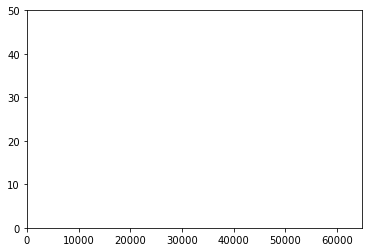

Elapsed time : 5.0  s. Current dt = 1.0 . Adaptive time = 697.1  s - Saving data 

Elapsed time : 10.0  s. Current dt = 1.0 . Adaptive time = 586.1  s - Saving data 

Elapsed time : 15.0  s. Current dt = 1.0 . Adaptive time = 515.0  s - Saving data 

Elapsed time : 20.0  s. Current dt = 1.0 . Adaptive time = 464.3  s - Saving data 

Elapsed time : 25.0  s. Current dt = 1.0 . Adaptive time = 425.8  s - Saving data 

Elapsed time : 30.0  s. Current dt = 1.0 . Adaptive time = 395.2  s - Saving data 

Elapsed time : 35.0  s. Current dt = 1.0 . Adaptive time = 370.2  s - Saving data 

Elapsed time : 40.0  s. Current dt = 1.0 . Adaptive time = 349.1  s - Saving data 

Elapsed time : 45.0  s. Current dt = 1.0 . Adaptive time = 331.0  s - Saving data 

Elapsed time : 50.0  s. Current dt = 1.0 . Adaptive time = 315.2  s - Saving data 

Elapsed time : 55.0  s. Current dt = 1.0 . Adaptive time = 301.4  s - Saving data 

Elapsed time : 60.0  s. Current dt = 1.0 . Adaptive time = 289.0  s - Saving 

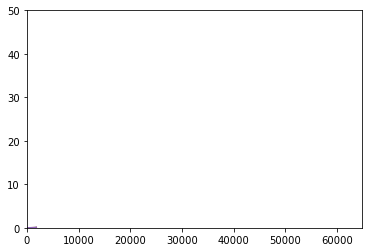

Elapsed time : 1805.0  s. Current dt = 1.0 . Adaptive time = 14.8  s - Saving data 

Elapsed time : 1810.0  s. Current dt = 1.0 . Adaptive time = 14.7  s - Saving data 

Elapsed time : 1815.0  s. Current dt = 1.0 . Adaptive time = 14.7  s - Saving data 

Elapsed time : 1820.0  s. Current dt = 1.0 . Adaptive time = 14.7  s - Saving data 

Elapsed time : 1825.0  s. Current dt = 1.0 . Adaptive time = 14.6  s - Saving data 

Elapsed time : 1830.0  s. Current dt = 1.0 . Adaptive time = 14.6  s - Saving data 

Elapsed time : 1835.0  s. Current dt = 1.0 . Adaptive time = 14.5  s - Saving data 

Elapsed time : 1840.0  s. Current dt = 1.0 . Adaptive time = 14.5  s - Saving data 

Elapsed time : 1845.0  s. Current dt = 1.0 . Adaptive time = 14.5  s - Saving data 

Elapsed time : 1850.0  s. Current dt = 1.0 . Adaptive time = 14.4  s - Saving data 

Elapsed time : 1855.0  s. Current dt = 1.0 . Adaptive time = 14.4  s - Saving data 

Elapsed time : 1860.0  s. Current dt = 1.0 . Adaptive time = 14.3

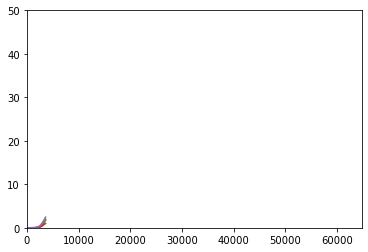

Elapsed time : 3605.0  s. Current dt = 1.0 . Adaptive time = 6.2  s - Saving data 

Elapsed time : 3610.0  s. Current dt = 1.0 . Adaptive time = 6.2  s - Saving data 

Elapsed time : 3615.0  s. Current dt = 1.0 . Adaptive time = 6.1  s - Saving data 

Elapsed time : 3620.0  s. Current dt = 1.0 . Adaptive time = 6.1  s - Saving data 

Elapsed time : 3625.0  s. Current dt = 1.0 . Adaptive time = 6.1  s - Saving data 

Elapsed time : 3630.0  s. Current dt = 1.0 . Adaptive time = 6.1  s - Saving data 

Elapsed time : 3635.0  s. Current dt = 1.0 . Adaptive time = 6.1  s - Saving data 

Elapsed time : 3640.0  s. Current dt = 1.0 . Adaptive time = 6.1  s - Saving data 

Elapsed time : 3645.0  s. Current dt = 1.0 . Adaptive time = 6.1  s - Saving data 

Elapsed time : 3650.0  s. Current dt = 1.0 . Adaptive time = 6.1  s - Saving data 

Elapsed time : 3655.0  s. Current dt = 1.0 . Adaptive time = 6.0  s - Saving data 

Elapsed time : 3660.0  s. Current dt = 1.0 . Adaptive time = 6.0  s - Saving

KeyboardInterrupt: 

In [13]:
## Code Block 11

t = 0                                   # Initializates the variable
while t < tmax:
    
    rbd.t = t           # Current simulation time
    
    #Calculates the rainfall intensity - variable in time
    if (t >= pTime[p_i+1]):
        rmg['node']['rainfall__intensity'] =  np.zeros(rmg.number_of_nodes) + pI[p_i+1]
        p_i += 1
    else:
        rmg['node']['rainfall__intensity'] = np.zeros(rmg.number_of_nodes) + pI[p_i+1]
    
    of.overland_flow()  # Runs overland flow for one time step
    if t == 0:
        rbd.run_one_step()  # Runs riverBedDynamics for one time step
    
    ## Stores results
    storeData = round(storeData-of.dt, dtPrecision)
    if (storeData <=0) or storeNow:
        os.chdir(outputFolder)
        print('Elapsed time :',np.round(t,1),' s. Current dt =',\
              np.round(of.dt,1),'. Adaptive time =',np.round(of._adaptive_dt,1),' s - Saving data \n')
        data = np.hstack([t,(np.abs(of._q[link_to_sample] * rmg.dx))])
        data = np.reshape(data,[1,data.shape[0]])
        with open("output0_links_surface_water__discharge.txt", "ab") as f:
            np.savetxt(f, data,'%.3f')
        data = np.hstack([t,(of._h[node_to_sample])])
        data = np.reshape(data,[1,data.shape[0]])
        with open("output1_node_surface_water__depth.txt", "ab") as f:
            np.savetxt(f, data,'%.3f')      
        data = np.hstack([t,rmg.at_node["topographic__elevation"][node_to_sample]])
        data = np.reshape(data,[1,data.shape[0]])
        with open("output3_node_topographic__elevation.txt", "ab") as f:
            np.savetxt(f, data,'%.3f')  
        storeData = round(storeDataOrg, dtPrecision)
        storeNow = False
        os.chdir(cwd)

    tPlot = round(tPlot-of.dt, dtPrecision)
    if tPlot <= 0  or plotNow:
        os.chdir(outputFolder)
        
        print('Elapsed time :',np.round(t,1),' s. Current dt =',\
              np.round(of.dt,1),'. Adaptive time =',np.round(of._adaptive_dt,1),' s - Saving plot \n')
        
        # Water depth raster
        filename='depth_'+str(np.round(t,0))+'.asc'    
        #saveRaster(data,filename,rmg)
        imshow_grid(rmg, 'surface_water__depth',cmap='Blues',vmin=0,vmax=0.5,plot_name='depth_ at '+ str(np.round(t,0)))
        output= filename + str(np.round(t,0))+'.png'
        plt.savefig(output,dpi=300); plt.close()
        
        #Bed surface elevation plot
        filename='topographicElevation_'+str(np.round(t,0))+'.asc'    
        ZBed = rmg.at_node["topographic__elevation"]
        #saveRaster(data,filename,rmg)
        imshow_grid(rmg, ZBed ,cmap='RdGy',vmin=0,vmax=40,plot_name='topographic__elevation' + str(np.round(t,0)))
        output= filename + str(np.round(t,0))+'.png'
        plt.savefig(output,dpi=300); plt.close()
        
        #Bed surface variation plot
        filename = 'topographicVariation_'+str(np.round(t,0))+'.asc'    
        ZVar = rmg.at_node["topographic__elevation"] - rmg.at_node['topographic__elevation_original'] 
        #saveRaster(data,filename,rmg)
        imshow_grid(rmg, ZVar,cmap='RdGy',vmin=0,vmax=25,plot_name='topographicVariation ' + str(np.round(t,0)))
        output= filename+str(np.round(t,0))+'.png'
        plt.savefig(output,dpi=300); plt.close()

        x, y0, y1, y2 , y3, y4 = np.loadtxt('output0_links_surface_water__discharge.txt', delimiter=' ', unpack=True)
        plt.plot(x,y0,x,y1,x,y2,x,y3,x,y4)
        plt.xlim([0,18*3600])
        plt.ylim([0,50])
        plt.show()    

        plotNow = False
        tPlot = tPlotOrg
        os.chdir(cwd)

    # Updating t
    if (t + of.dt > tmax) and check_tmax:
        of.dt = tmax - t
        t = tmax
        storeDataNow = True  
        plotNow = True
        check_tmax = False
    else:
        t = round(t + of.dt, dtPrecision)  
    

The results will be located in the output folder.